Notebook for exploring the relation between topological data analysis (TDA) features and behavioral data in the females from the training group. 

TDA data is constructed using the HCP_features.py file, which also used TDA code from Fernando. 

Behavioral data is constructed using the Make_cog_file_HCP Jupyer Notebook. 
Behavioral data is splitted into train and test group using Split_HCP_data_males Jupyter Notebook, or Split_HCP_data_females for females


# Import and order data

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
from matplotlib.offsetbox import AnchoredText
import statsmodels.formula.api as smf

In [39]:
tda = pd.read_csv("/Users/minneschepers/Desktop/HCP/TDA_data/TDA_features_HCP_Males_Train.csv")
bd = pd.read_csv("/Users/minneschepers/Desktop/HCP/Behavioral_Data/Males_train.csv")

In [40]:
bd.shape

(159, 41)

In [41]:
tda.shape

(158, 128)

In [42]:
tda['Subject']

0      HCA7502059
1      HCA9187693
2      HCA7552478
3      HCA8623581
4      HCA6649993
          ...    
153    HCA7703372
154    HCA6318465
155    HCA6010538
156    HCA7985510
157    HCA8923391
Name: Subject, Length: 158, dtype: object

In [43]:
# Only include subjects from bd which are also in tda
same = bd['subject'].isin(tda['Subject'])
print(same.value_counts())
bd.drop(bd[~same].index, inplace = True)
print(bd.shape)

True     158
False      1
Name: subject, dtype: int64
(158, 41)


In [44]:
# Only include subjects from tda which are also in bd
same = tda['Subject'].isin(bd['subject'])
print(same.value_counts())
tda.drop(tda[~same].index, inplace = True)
print(tda.shape)

True    158
Name: Subject, dtype: int64
(158, 128)


In [45]:
# Sort bd by subject and reset index before concatenating
bd.sort_values(by=['subject'], inplace=True)
bd.reset_index(drop=True, inplace=True)
print(bd['subject'])

0      HCA6010538
1      HCA6047359
2      HCA6054457
3      HCA6108050
4      HCA6111241
          ...    
153    HCA9865005
154    HCA9868920
155    HCA9882308
156    HCA9912391
157    HCA9947411
Name: subject, Length: 158, dtype: object


In [46]:
# Sort tda by subject and reset index before concatenating
tda.sort_values(by=['Subject'], inplace=True)
tda.reset_index(drop=True, inplace=True)
print(tda['Subject'])

0      HCA6010538
1      HCA6047359
2      HCA6054457
3      HCA6108050
4      HCA6111241
          ...    
153    HCA9865005
154    HCA9868920
155    HCA9882308
156    HCA9912391
157    HCA9947411
Name: Subject, Length: 158, dtype: object


In [47]:
# Concatenate bd and tda into df
print(bd.shape)
print(tda.shape)
df = pd.concat([bd, tda], axis=1)
print(df.shape)

(158, 41)
(158, 128)
(158, 169)


In [48]:
# Create EF (executive functioning column) as mean of flanker and dccs
df['EF_age'] = df[['flanker_age', 'dccs_age']].mean(axis=1)
df['EF_unadjusted'] = df[['flanker_unadjusted', 'dccs_unadjusted']].mean(axis=1)

# Order bd columns in lists
age_adjusted = [i for i in bd.columns if '_age' in i]
age_adjusted.append('EF_age')
age_adjusted.append('age_years')
unadjusted = [i for i in bd.columns if '_unadjusted' in i]
unadjusted.append('EF_unadjusted')
natper = [i for i in bd.columns if '_np' in i]
subject_information = ['subject',  'sex', 'age_months']
WM = ['lswmt_unadjusted', 'lswmt_age']
EF = ['dccs_unadjusted', 'dccs_age',
       'flanker_unadjusted', 'flanker_age',
      'EF_unadjusted', 'EF_age']

In [49]:
# Order tda columns in lists
tda_features = tda.columns[1:]

DMN_curvatures = [i for i in tda_features if 'DMN' in i if 'curv' in i]
FPN_curvatures = [i for i in tda_features if 'FPN' in i if 'curv' in i]
all_curvatures = [i for i in tda_features if 'all' in i if 'curv' in i]
p3_cliques = [i for i in tda_features if 'p3cliques' in i]
p4_cliques = [i for i in tda_features if 'p4cliques' in i]
global_features = [i for i in tda_features if i not in DMN_curvatures if i not in FPN_curvatures if i not in all_curvatures if i not in p3_cliques if i not in p4_cliques]

WM_age = ['lswmt_age']
EF_age = ['dccs_age', 'flanker_age', 'EF_age']
all_kur = [i for i in tda_features if 'kur' in i]
all_skew = [i for i in tda_features if 'skew' in i]
all_std = [i for i in tda_features if 'std' in i]
all_ent = [i for i in tda_features if 'curv_ent' in i]

---
# Create dataframe without nan values


In [50]:
to_include = age_adjusted + unadjusted

In [51]:
# Only include age_adjusted, and then add subject column
df_no_nan = df[to_include]
df_no_nan['subject'] = list(df['subject'])
df_no_nan['EF_unadjusted'] = list(df['EF_unadjusted'])
print(df_no_nan.shape)

(158, 26)


<ipython-input-51-3ffb2cdb13d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['subject'] = list(df['subject'])
<ipython-input-51-3ffb2cdb13d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['EF_unadjusted'] = list(df['EF_unadjusted'])


In [52]:
# Show number of non_nan_values per column
df_no_nan.count()

fluidcog_age                128
crystalcog_age              126
earlychildcog_age           127
totalcog_age                126
dccs_age                    128
flanker_age                 128
lswmt_age                   129
orrt_age                    128
pcps_age                    129
picseq_age                  129
pvt_age                     128
EF_age                      128
age_years                   157
fluidcog_unadjusted         125
crystalcog_unadjusted       125
earlychildcog_unadjusted    124
totalcog_unadjusted         124
dccs_unadjusted             126
flanker_unadjusted          126
lswmt_unadjusted            127
orrt_unadjusted             127
pcps_unadjusted             127
picseq_unadjusted           126
pvt_unadjusted              126
EF_unadjusted               126
subject                     158
dtype: int64

In [53]:
# Drop all nan values
df_no_nan = df_no_nan.dropna()

In [54]:
# Add tda data to df_no_nan
same = tda['Subject'].isin(df_no_nan['subject'])
tda.drop(tda[~same].index, inplace = True)

In [55]:
# Sort tda data and reset index
tda.sort_values(by=['Subject'], inplace=True)
tda.reset_index(drop=True, inplace=True)
# Sort df and reset index
df_no_nan.sort_values(by=['subject'], inplace=True)
df_no_nan.reset_index(drop=True, inplace=True)

# Merge dataframes
print(df_no_nan.shape)
print(tda.shape)
df_no_nan = pd.concat([df_no_nan, tda], axis=1)
print(df_no_nan.shape)

(122, 26)
(122, 128)
(122, 154)


In [98]:
df_no_nan.to_csv('/Users/minneschepers/Desktop/HCP/Practice_data/Males_exploratory.csv', index=False)

# Data exploration

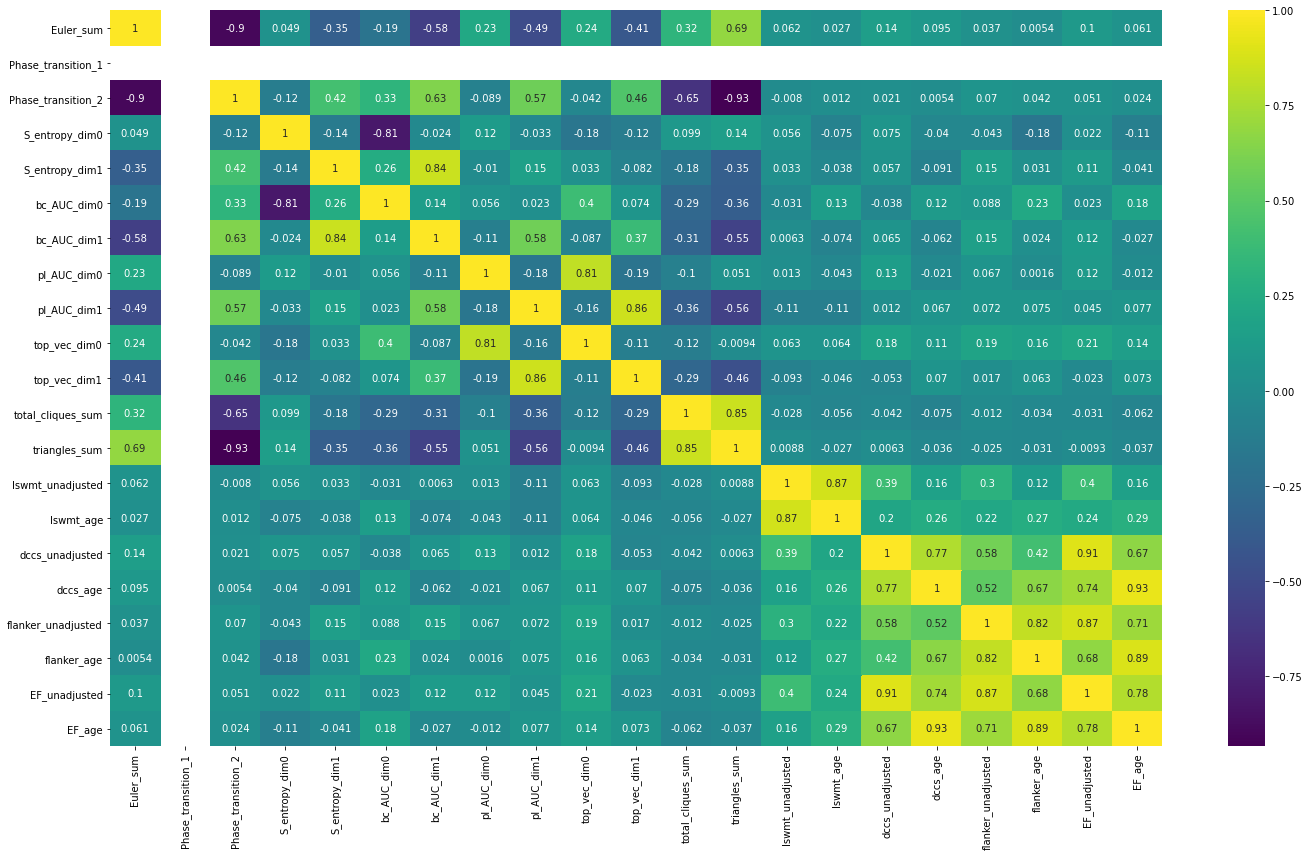

In [56]:
to_compare = global_features + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

In [57]:
# to_compare = DMN_curvatures + WM + EF
# fig, ax = plt.subplots(figsize=(25,15))
# sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
# plt.tight_layout()
# plt.savefig('/Users/minneschepers/Downloads/DMN_curvatures.png')

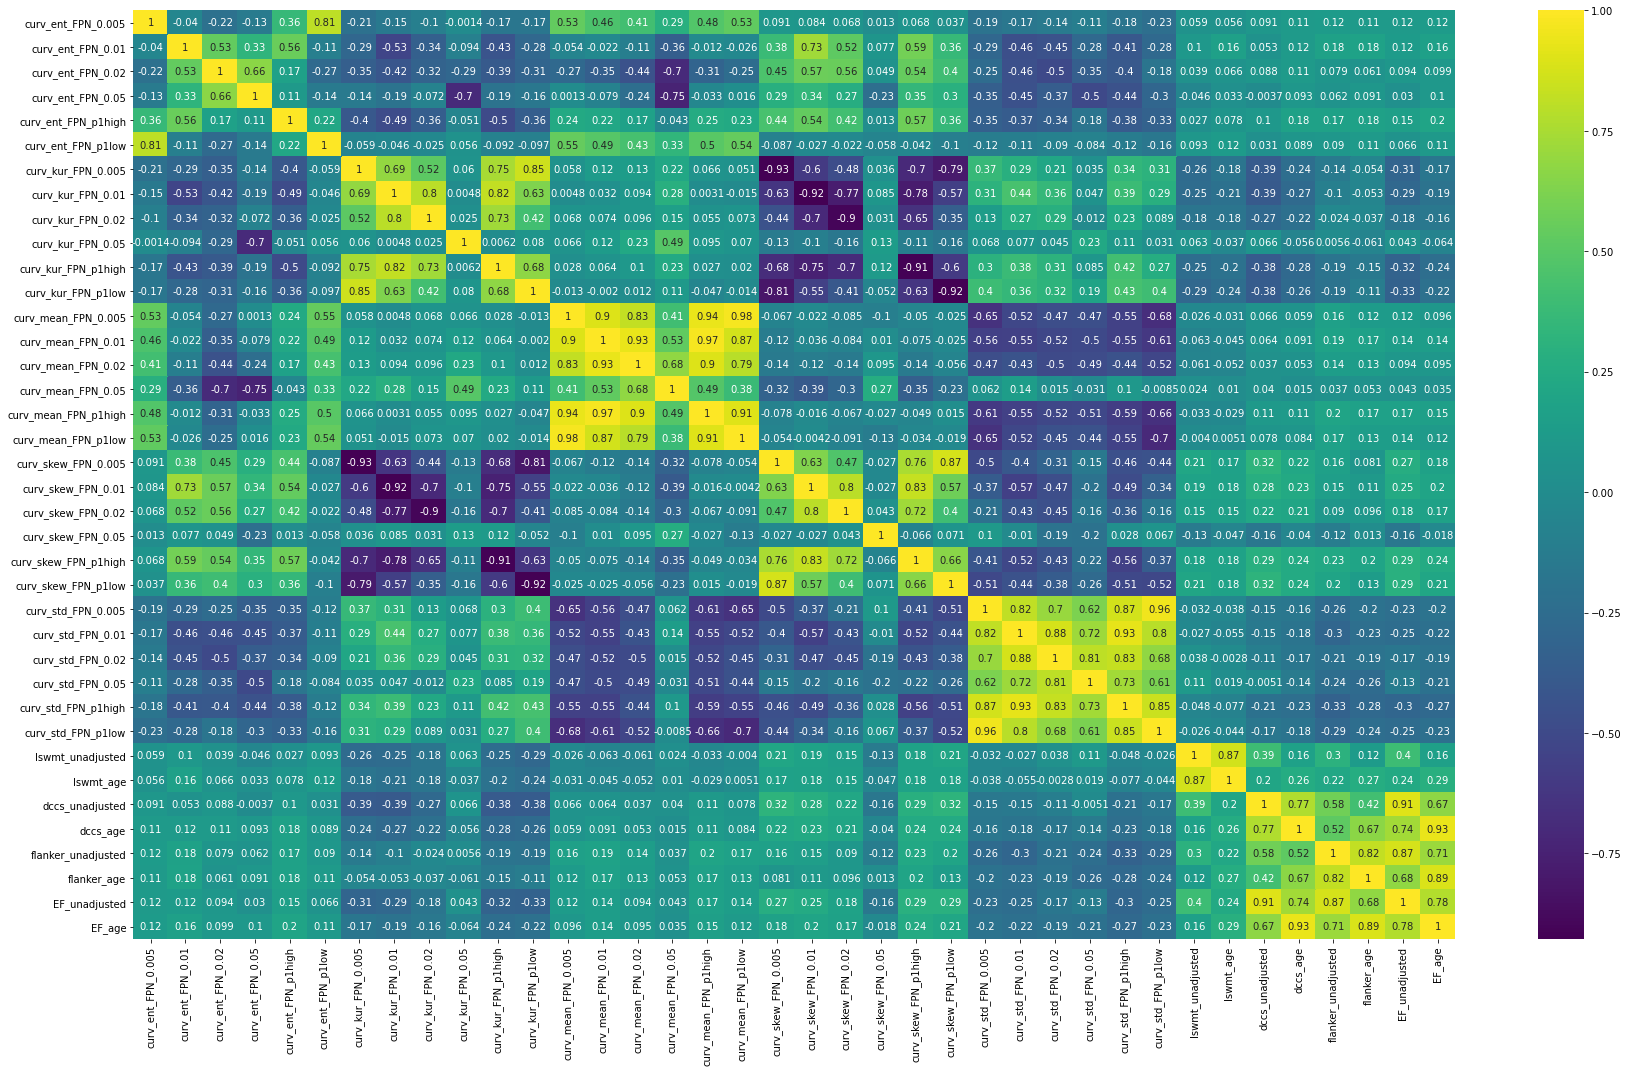

In [58]:
to_compare = FPN_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('/Users/minneschepers/Downloads/FPN_curvatures.png')

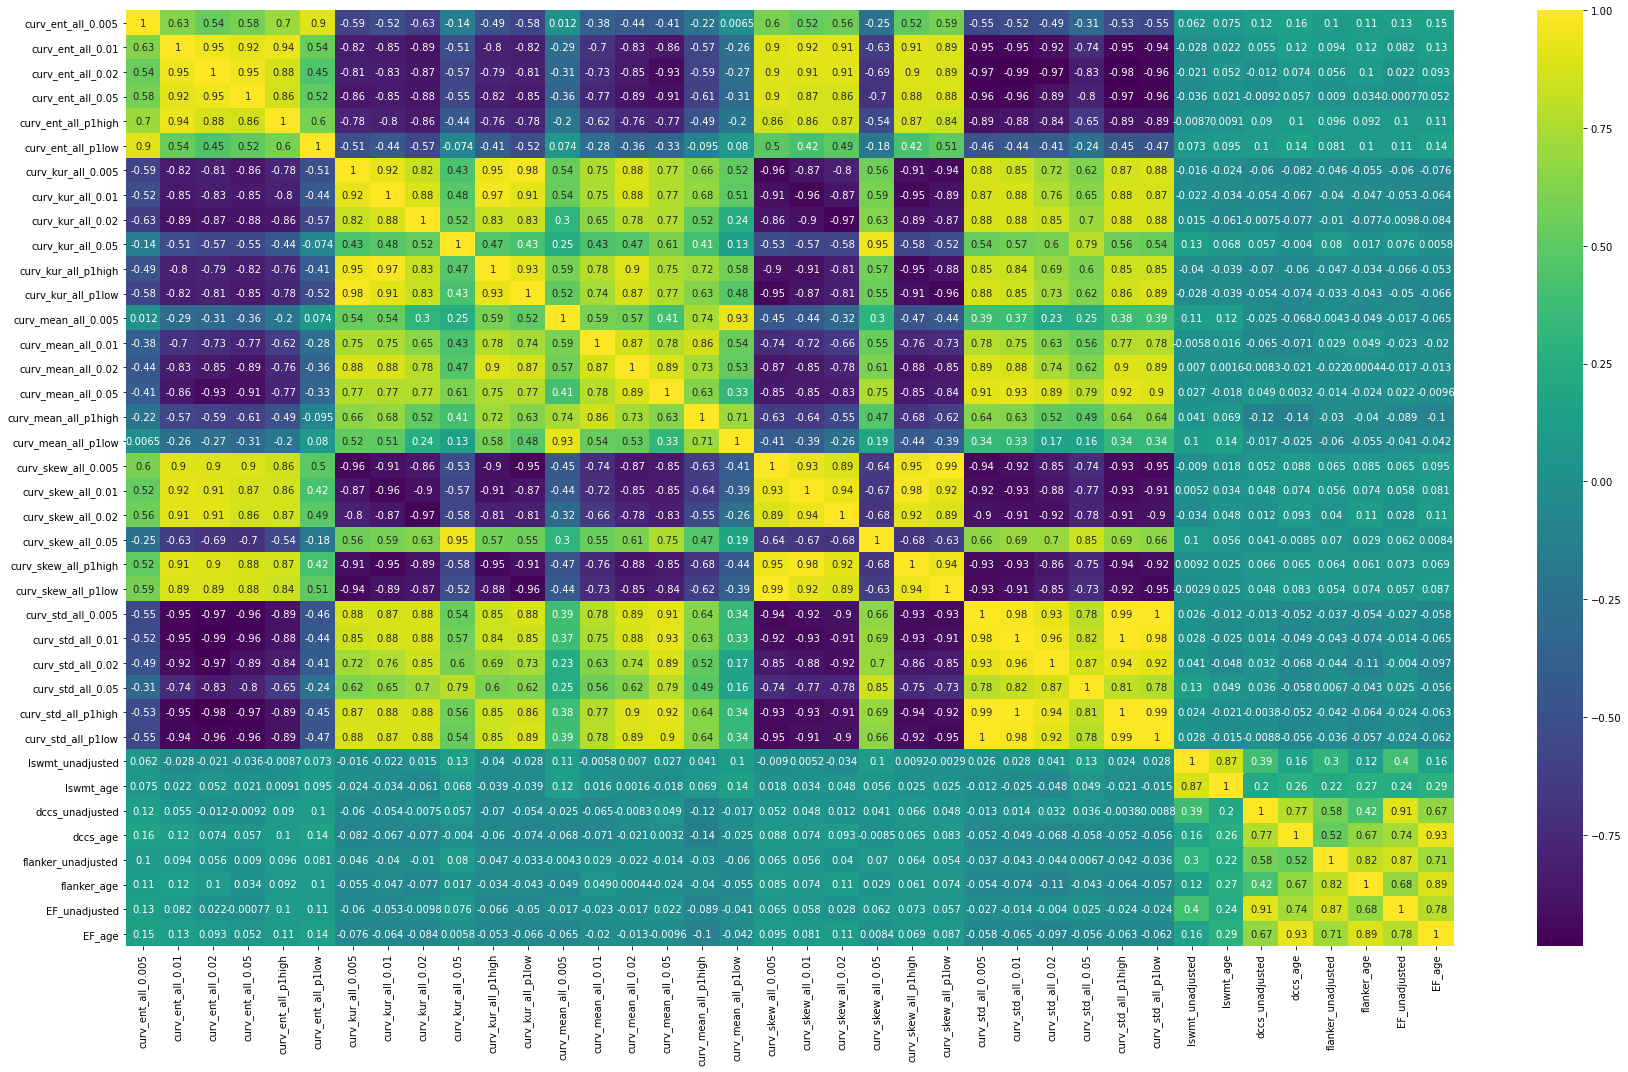

In [59]:
to_compare = all_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('/Users/minneschepers/Downloads/all_curvatures.png')

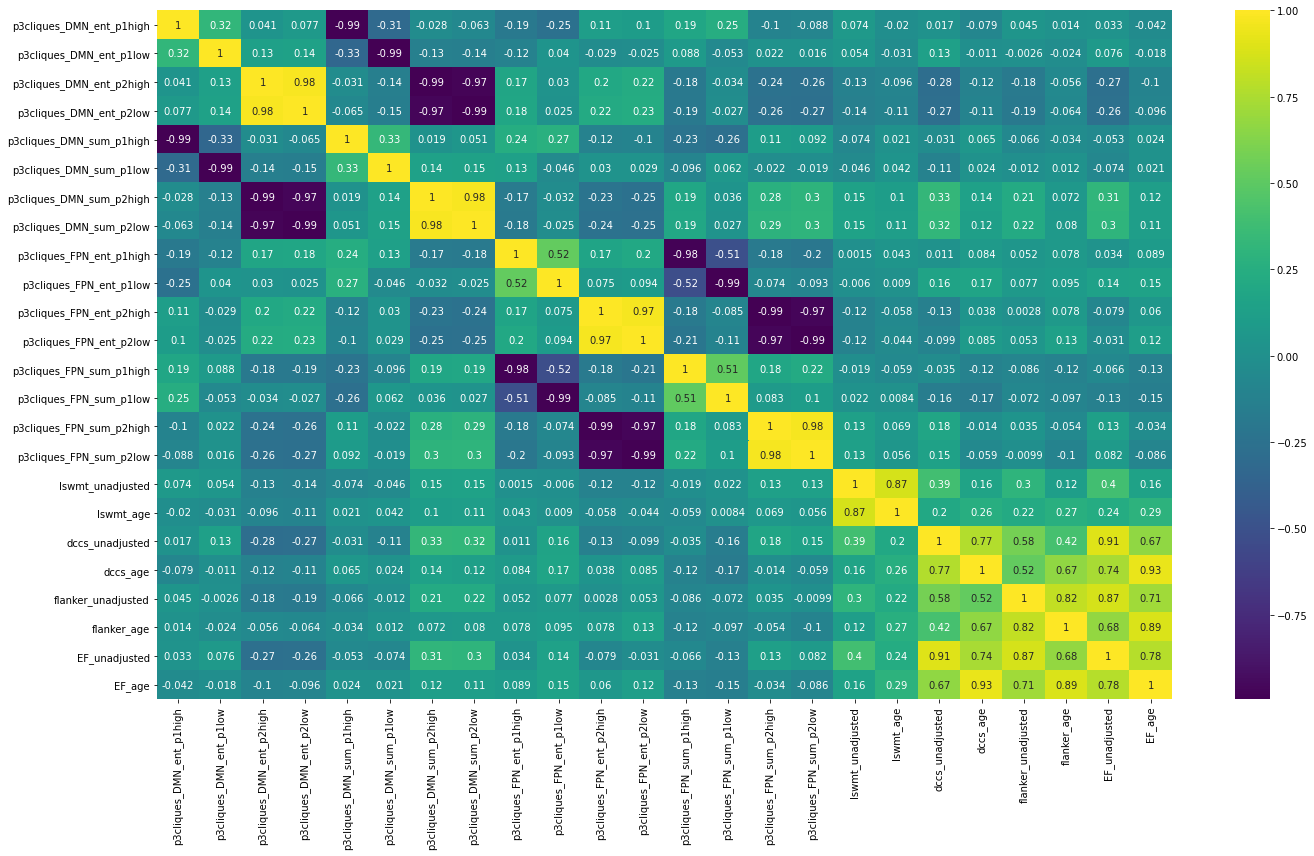

In [60]:
to_compare = p3_cliques + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

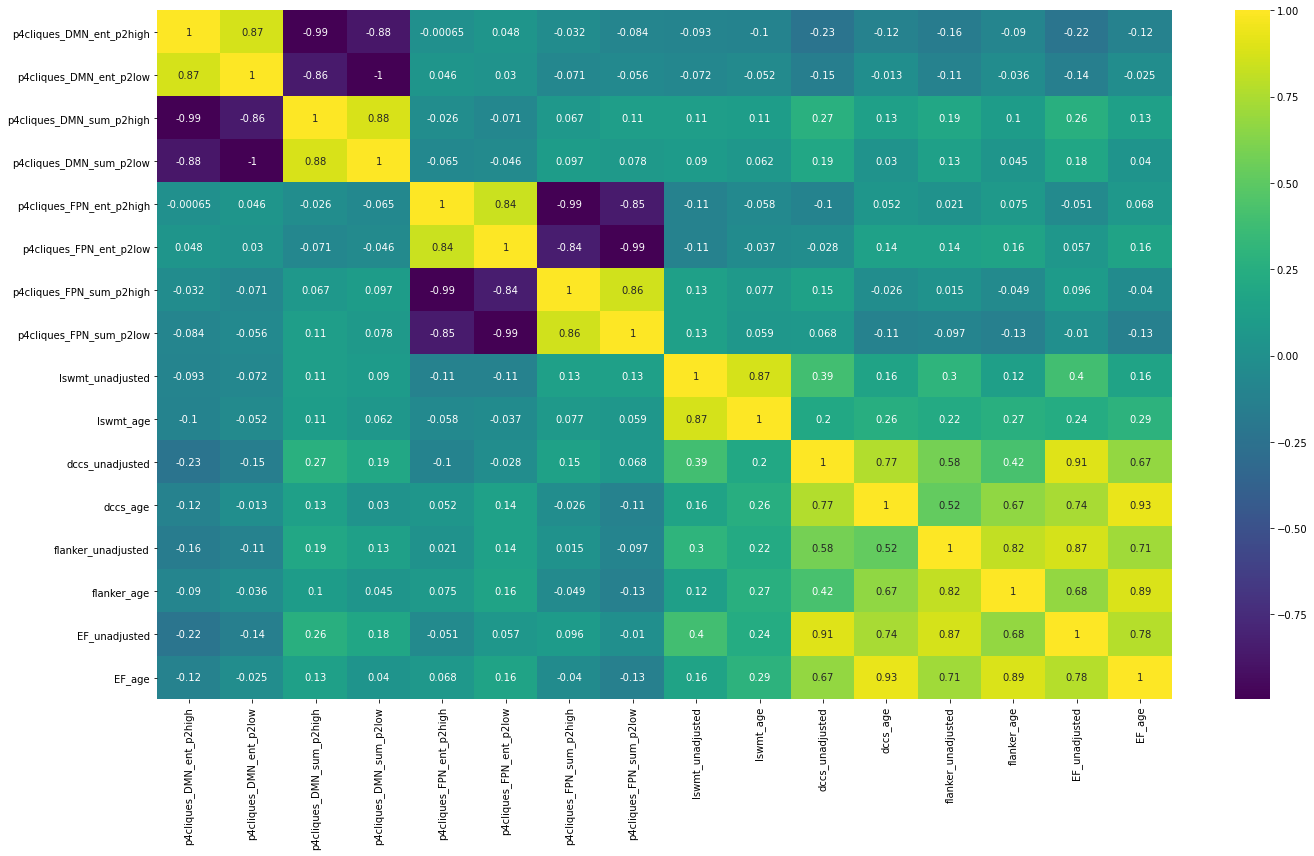

In [61]:
to_compare = p4_cliques + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

### Define functions for data exploration:

In [62]:
def regplot(X_column, y_column, df):
    
    X = df[X_column]
    y = df[y_column]
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    p_value = round(est2.pvalues[1], 5)
    R2 = round(est2.rsquared, 5)

    sns.regplot(x=X, y=y)
    plt.figtext(0.72, 0.78, f' R2: {R2} \n p: {p_value}', fontsize=10)
    plt.xlabel(X_column)
    plt.ylabel(y_column)
    plt.show()

In [63]:
def pregplot(X_column, y_column, df):
    
    order = 2
    
    X = df[X_column]
    y = df[y_column]
    
    model = np.poly1d(np.polyfit(X, y, order))
    results = smf.ols(formula='y ~ model(X)', data=df).fit()
    R2 = results.rsquared
    p_value = results.f_pvalue

    sns.regplot(x=X, y=y, order=order)
    plt.figtext(0.72, 0.78, f' R2: {R2:.5f} \n p: {p_value:.5f}', fontsize=10)
    plt.xlabel(X_column)
    plt.ylabel(y_column)
    plt.show()
    
# pregplot('bc_AUC_dim0', 'EF_age', df_no_nan)

In [64]:
def z_scored_df(df, X_column, cut_off, print_zscores):
    
    z_scored = np.abs(stats.zscore(df[X_column]))
    if print_zscores == 1:
        print(z_scored)
    filtered = (z_scored < cut_off)
    df_new = df[filtered]
    
    print(f'Number excluded: {df.shape[0] - df_new.shape[0]}')
    
    return df_new

In [65]:
def z_scored_regplot(x, y, dataframe, cut_off, print_zscores):
    
    X_column = x
    y = y
    df = dataframe
    
    regplot(X_column, y, z_scored_df(df, X_column, cut_off=cut_off, print_zscores=print_zscores))

In [66]:
def z_scored_pregplot(x, y, dataframe, cut_off, print_zscores):
    
    X_column = x
    y = y
    df = dataframe
    
    pregplot(X_column, y, z_scored_df(df, X_column, cut_off=cut_off, print_zscores=print_zscores))

In [67]:
def get_best_predictors(x, y, dataframe, n, zscore):
        
    # This function gets the n best predictors for a target and produces regression plots
    
    print(f'\n---------------- y = {y} ----------------\n')
    df = dataframe
    columns = []
    
    [columns.append(i) for i in x]
    columns.append(y)

    # Create correlation matrix
    corr = df[columns].corr()
    # Only include column with corr values with y-column, and exclude row with y (autocorrelation)
    # Absolutize to also get large negative correlation values
    corr = np.abs(corr.iloc[:-1,-1:])
    # Get n largest corr values
    corr = corr.nlargest(n, corr.columns)
    print(corr)
    print('\n')
    # Save predictors to list
    best_predictors = corr.index.to_list()
    # Make for each predictor regression plot
    [regplots(predictor, y, df, zscore) for predictor in best_predictors]
    
# get_best_predictors(global_features, 'fluidcog_age', df_no_nan, n=3, zscore=0)

In [68]:
def regplots(X_column, y_column, df, zscore):
    
    order = 2
    
    if zscore == 0:
        df = df
    else:
        df = z_scored_df(df, X_column, cut_off=zscore, print_zscores=0)
    
    X = df[X_column]
    y = df[y_column]
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
    fig.suptitle(X_column)

    # Plot linear regression
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    p_value = est2.pvalues[1]
    R2 = est2.rsquared
    
    sns.regplot(x=X, y=y, ax=ax1)
    anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    ax1.add_artist(anchored_text)
    
    # Plot polynomial regression
    model = np.poly1d(np.polyfit(X, y, order))
    results = smf.ols(formula='y ~ model(X)', data=df).fit()
    R2 = results.rsquared
    p_value = results.f_pvalue

    sns.regplot(x=X, y=y, order=order, ax=ax2)
    anchored_text = AnchoredText(f' R2: {R2:.5f} \n p: {p_value:.5f}', loc=1)
    ax2.add_artist(anchored_text)
    
    plt.show()

----
### Data exploration per outcome:

Age


---------------- y = age_years ----------------

                   age_years
bc_AUC_dim0         0.332123
S_entropy_dim0      0.294829
bc_AUC_dim1         0.183234
curv_std_DMN_0.02   0.163044
curv_std_DMN_0.05   0.159799


Number excluded: 0


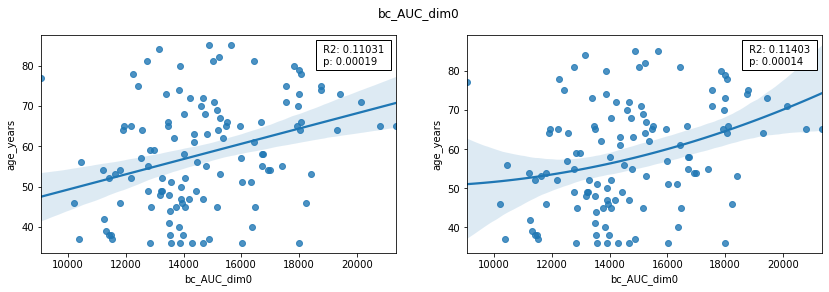

Number excluded: 2


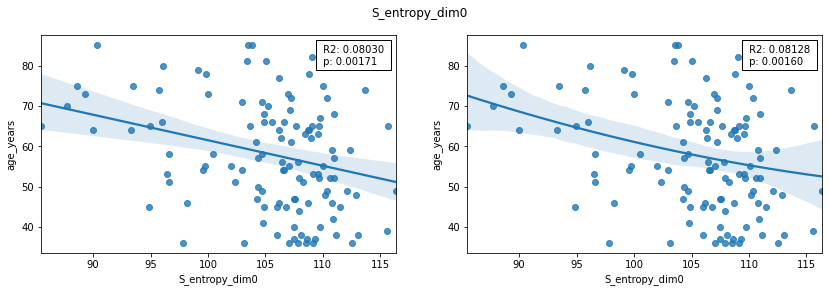

Number excluded: 0


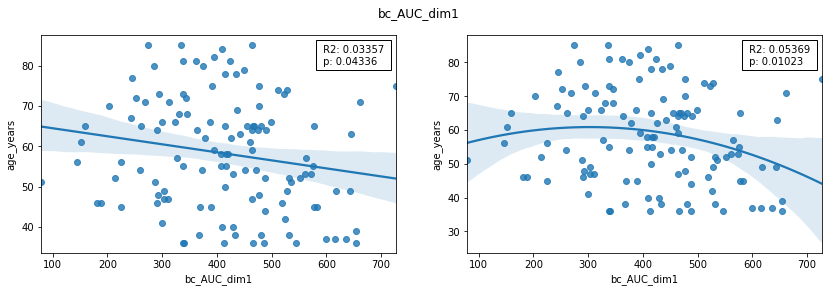

Number excluded: 2


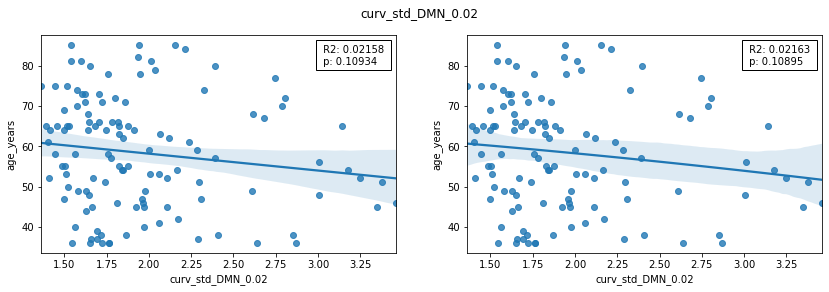

Number excluded: 2


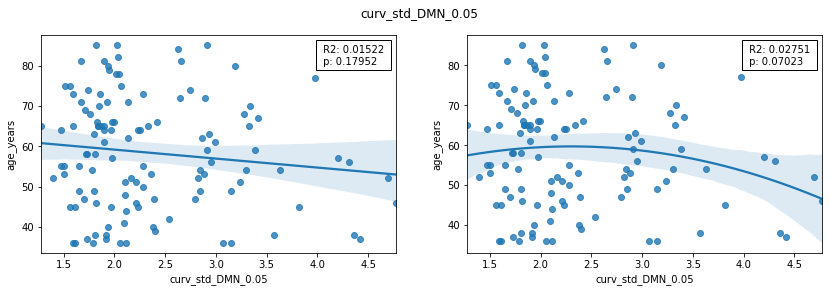

In [78]:
selected_features = list(tda_features)
to_remove = ['curv_skew_FPN_0.05', 'curv_kur_FPN_0.05']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features]

get_best_predictors(selected_features, 'age_years', df_no_nan, n=5, zscore=3)

--- 

### EF

dccs_age


---------------- y = dccs_age ----------------

                      dccs_age
curv_kur_FPN_p1high   0.276887
curv_kur_FPN_0.01     0.267848
curv_kur_FPN_p1low    0.262443
curv_skew_FPN_p1high  0.240683
curv_skew_FPN_p1low   0.239611


Number excluded: 1


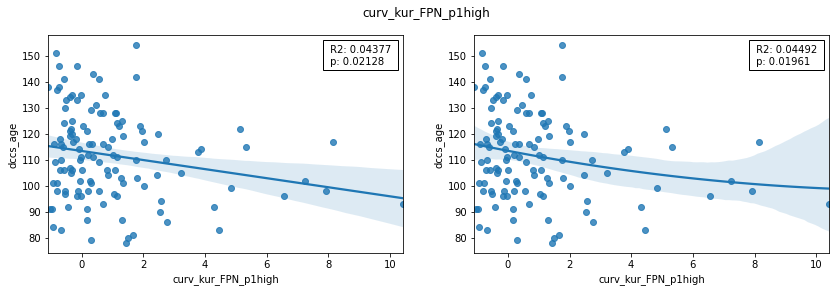

Number excluded: 1


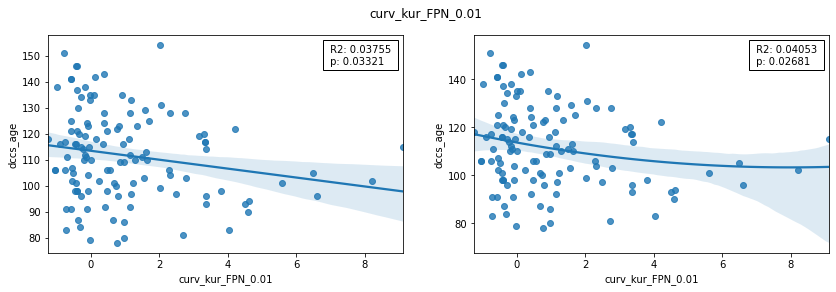

Number excluded: 1


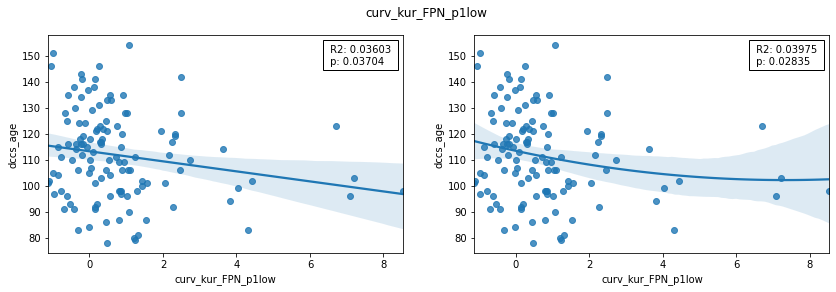

Number excluded: 1


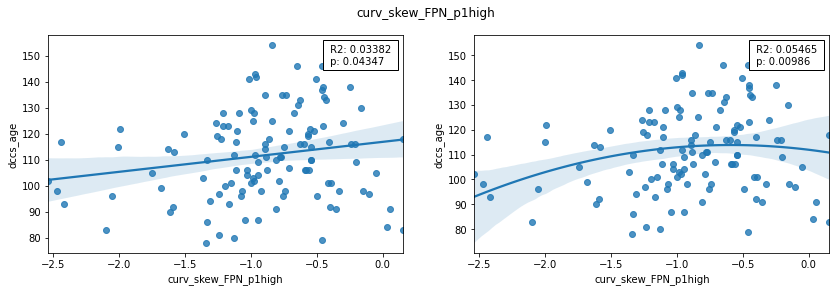

Number excluded: 1


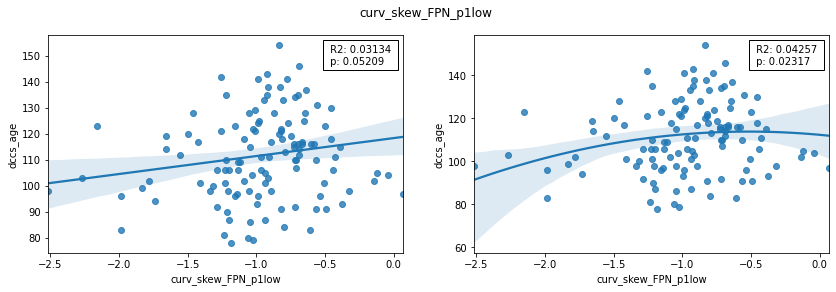

In [90]:
selected_features = list(tda_features)
to_remove = ['curv_skew_all_0.05']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'dccs_age', df_no_nan, n=5, zscore=4)

flanker_age


---------------- y = flanker_age ----------------

                     flanker_age
curv_std_FPN_p1high     0.276396
curv_std_FPN_0.05       0.260614
curv_std_FPN_p1low      0.236390
curv_std_FPN_0.01       0.228691
bc_AUC_dim0             0.226412




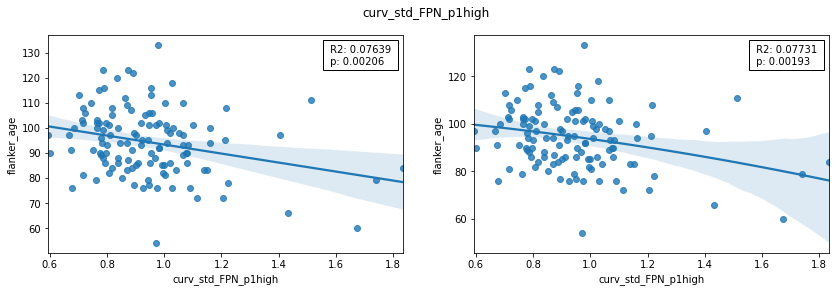

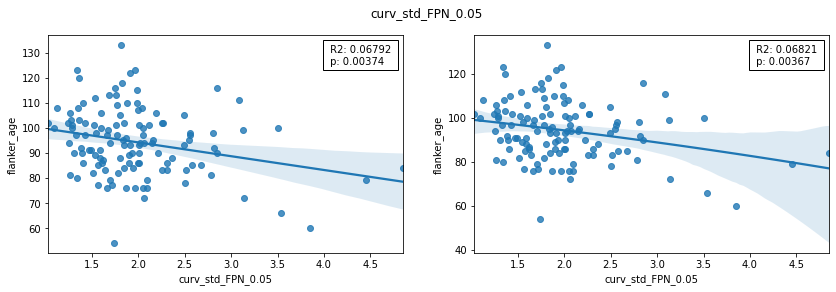

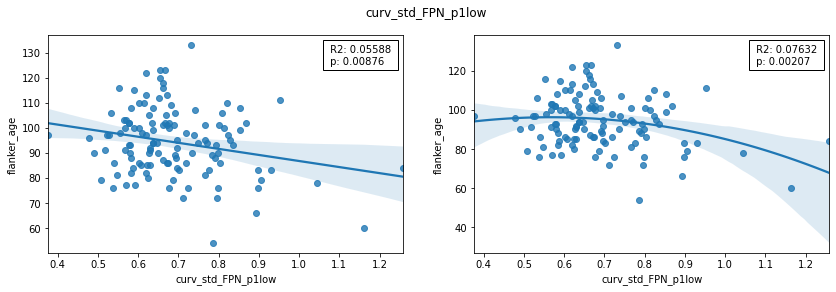

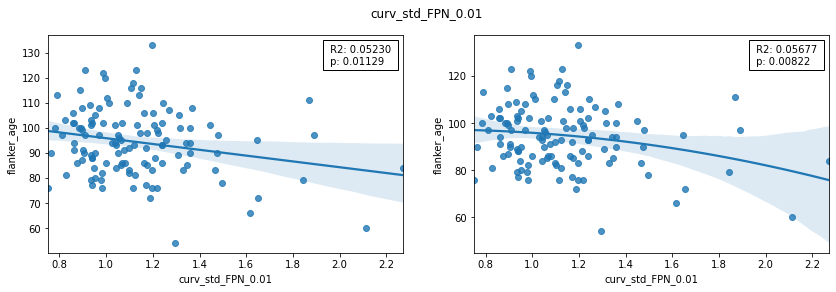

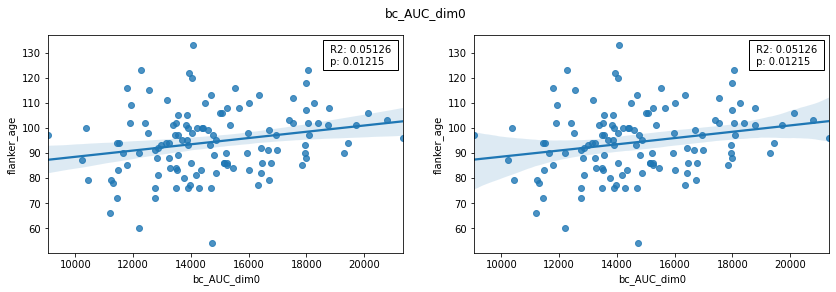

In [73]:
selected_features = list(tda_features)
to_remove = ['p3cliques_DMN_ent_p1low', 'curv_kur_FPN_0.02', 'p3cliques_DMN_sum_p1low']

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'flanker_age', df_no_nan, n=5, zscore=0)

EF_age


---------------- y = EF_age ----------------

                        EF_age
curv_std_FPN_p1high   0.274982
curv_skew_FPN_p1high  0.243994
curv_kur_FPN_p1high   0.240415
curv_std_FPN_p1low    0.226002
curv_std_FPN_0.01     0.221642


Number excluded: 1


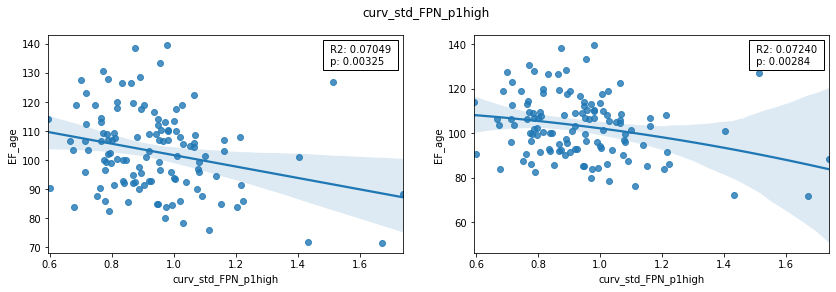

Number excluded: 1


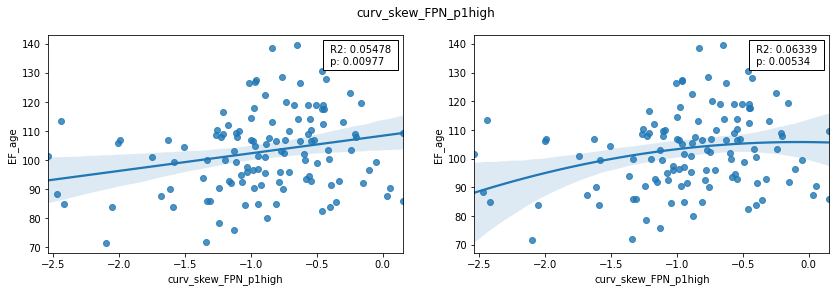

Number excluded: 1


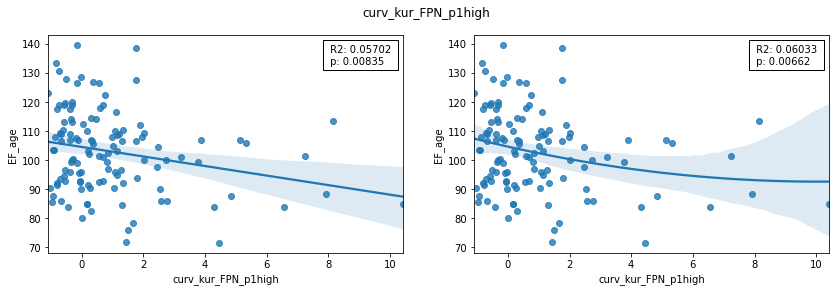

Number excluded: 1


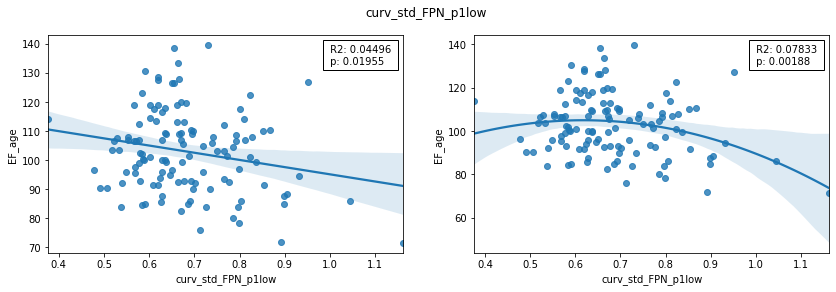

Number excluded: 1


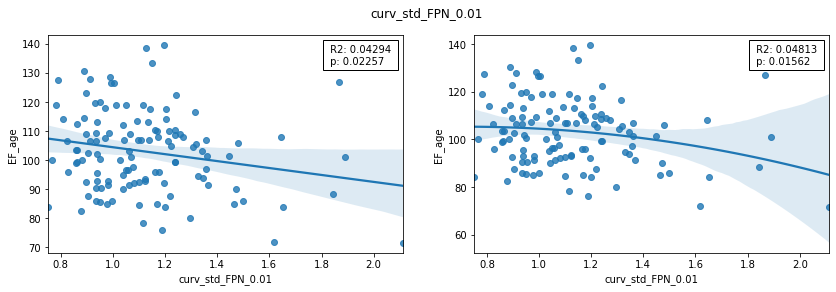

In [91]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'EF_age', df_no_nan, n=5, zscore=4)

---

### WM

lswmt_age


---------------- y = lswmt_age ----------------

                     lswmt_age
curv_kur_FPN_p1low    0.238881
curv_kur_FPN_0.01     0.208320
curv_kur_FPN_p1high   0.203777
curv_skew_FPN_p1low   0.181080
curv_kur_FPN_0.005    0.181075


Number excluded: 1


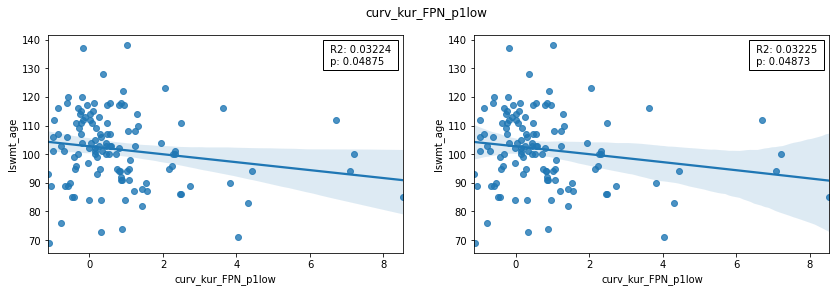

Number excluded: 1


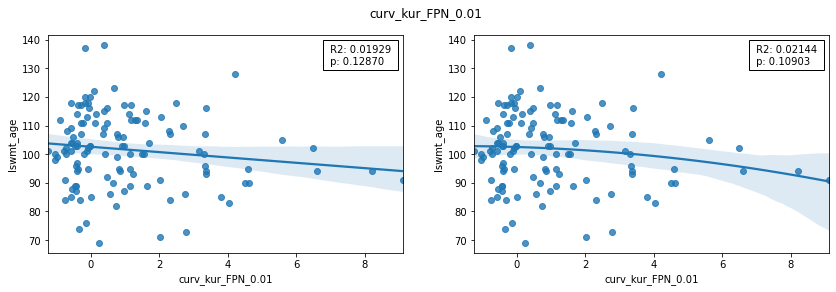

Number excluded: 1


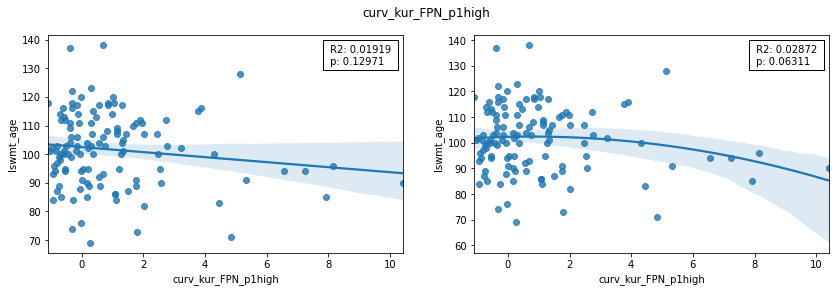

Number excluded: 1


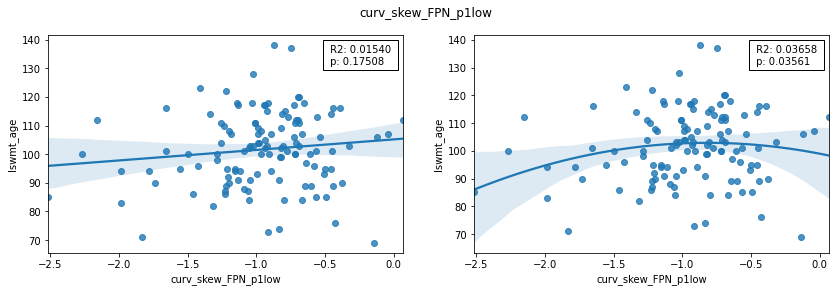

Number excluded: 1


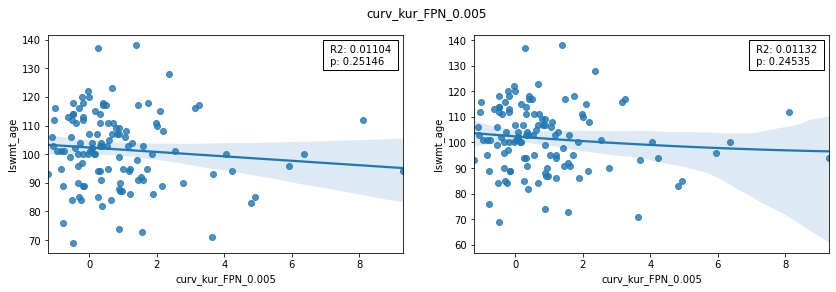

In [92]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'lswmt_age', df_no_nan, n=5, zscore=4)